# 3차 프로그래밍 과제

(1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.

Missing values:
 VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64
Cross-validation scores: [0.47889861 0.84983923 0.71304024 0.82737025 0.92605155]
Mean cross-validation score: 0.7590399768066333
Mean Squared Error: 9507.841040831785
R^2 Score: 0.8132306271569909


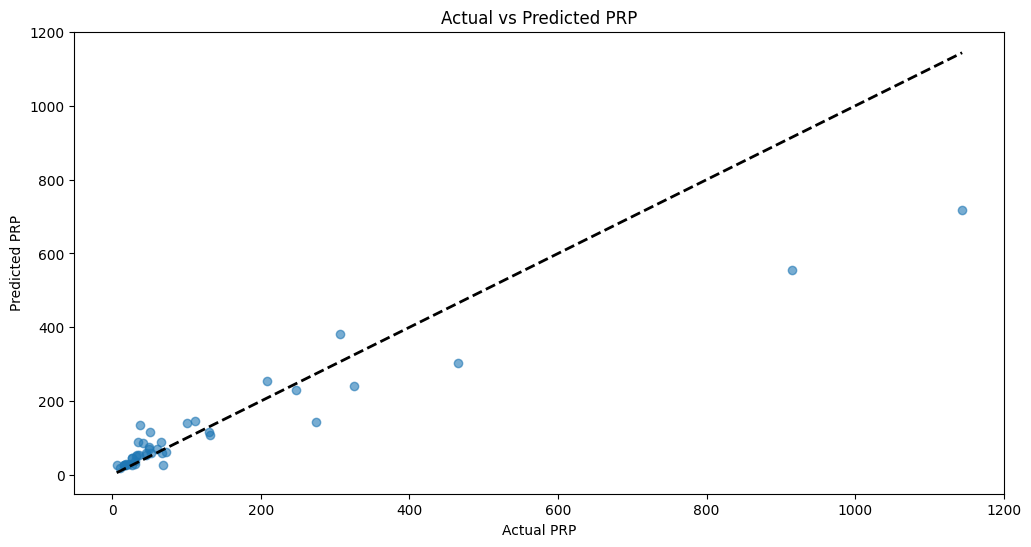

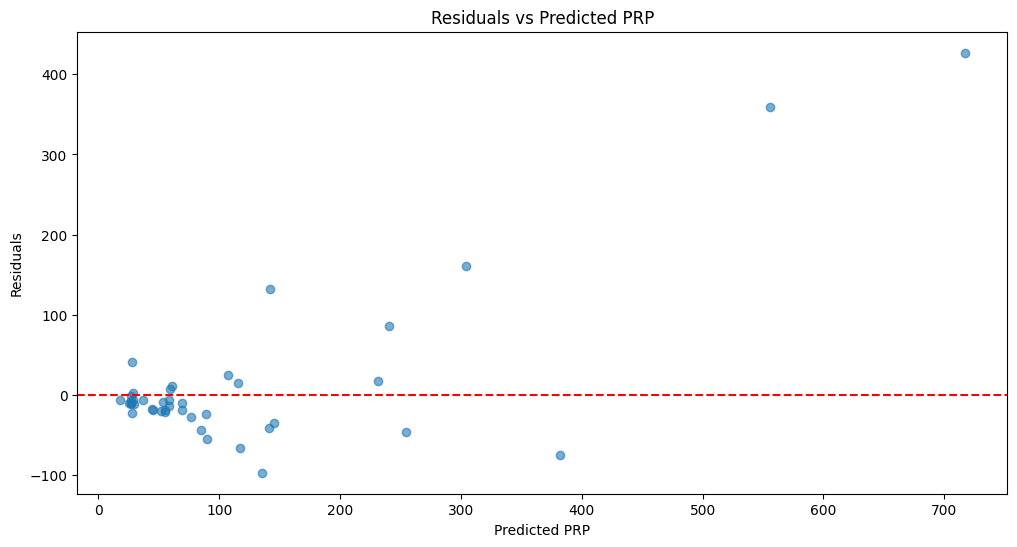

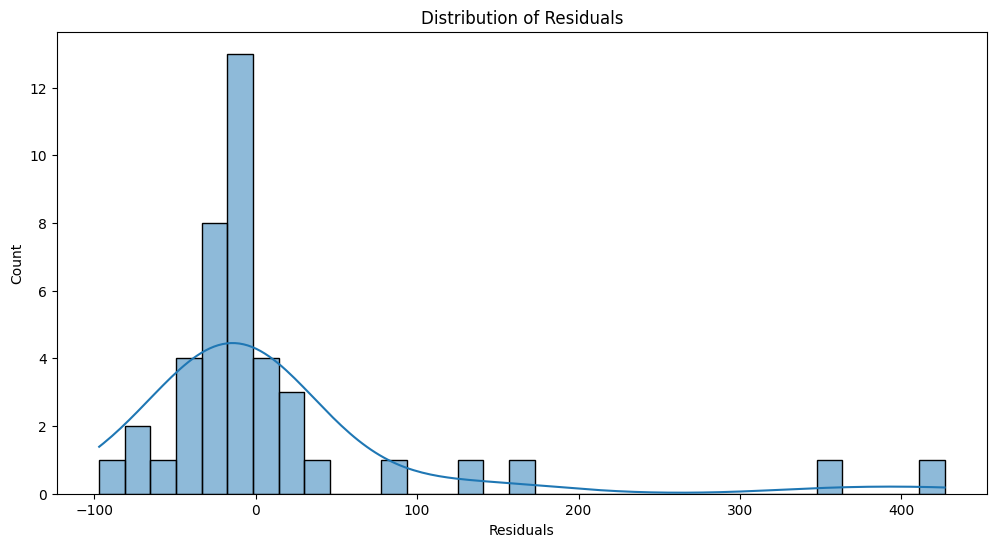

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# machine.data_update.csv 데이터 셋 불러오기
data = pd.read_csv('machine.data_update.csv')

# 결측값 확인 및 처리
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# 범주형 데이터를 숫자형 데이터로 수치화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'], drop_first=True)

# 특성과 타겟 분리
features = data.drop('PRP', axis=1)
target = data['PRP']

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 잔차 (Residual) 시각화
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PRP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PRP')
plt.show()

# 잔차의 분포
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


(2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 

In [20]:
# 학습 데이터 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('학습데이터 MSE:', train_mse)
print('학습데이터 MAE:', train_mae)
print('학습데이터 R^2:', train_r2)

# 테스트 데이터 평가
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('테스트 데이터 MSE:', test_mse)
print('테스트 데이터 MAE:', test_mae)
print('테스트 데이터 R^2:', test_r2)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('교차 검증 점수:', cv_scores)
print('평균 교차 검증 점수:', np.mean(cv_scores))

학습데이터 MSE: 1.9091378649947554e-26
학습데이터 MAE: 9.462557151679418e-14
학습데이터 R^2: 1.0
테스트 데이터 MSE: 9507.841040831785
테스트 데이터 MAE: 48.54219253417248
테스트 데이터 R^2: 0.8132306271569909
교차 검증 점수: [0.47889861 0.84983923 0.71304024 0.82737025 0.92605155]
평균 교차 검증 점수: 0.7590399768066333


(3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

In [19]:
from sklearn.linear_model import Lasso
# Lasso 회귀 모델 생성 및 하이퍼파라미터 튜닝
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
y_test_pred = best_lasso.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print('테스트 데이터 R^2:', test_r2)

테스트 데이터 R^2: 0.9509841586082738


(4) 회귀분석 모델의 성능을 개선하는 방법 중 하나인 피처을 추가했을 때 성능과 비교

Missing values:
 VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64
Cross-validation scores: [0.47889861 0.84983923 0.71304024 0.82737025 0.92605155]
Mean cross-validation score: 0.7590399768066333
Mean Squared Error: 9507.841040831785
R^2 Score: 0.8132306271569909


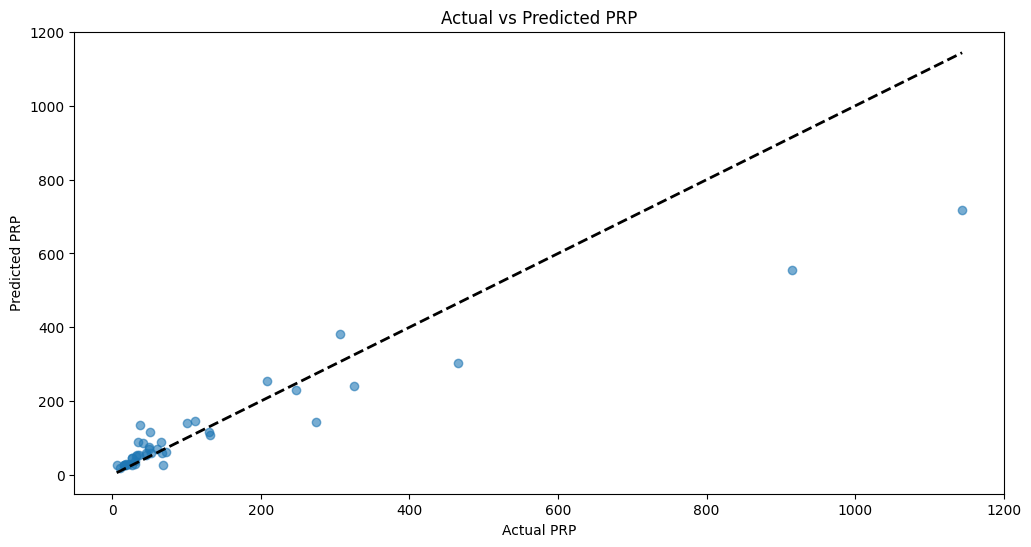

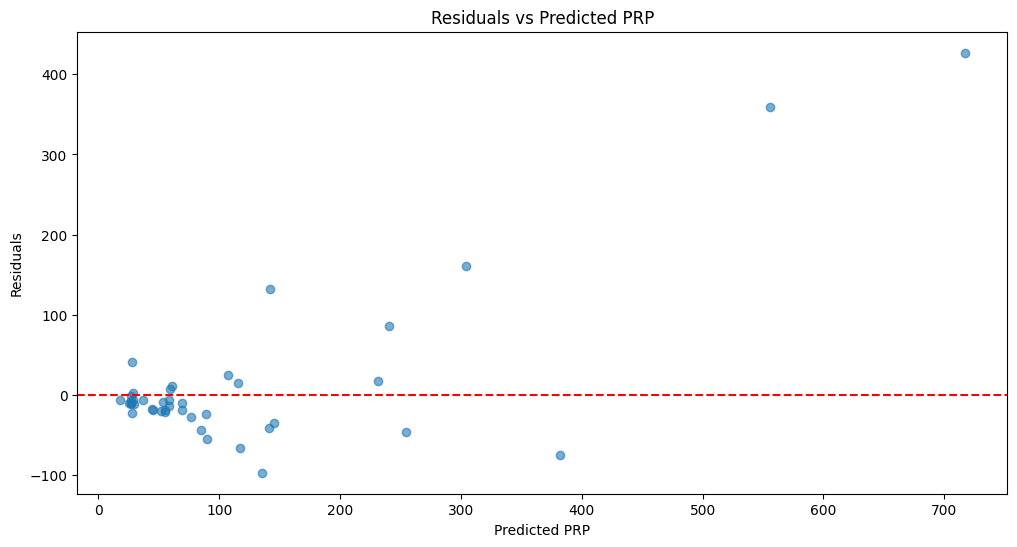

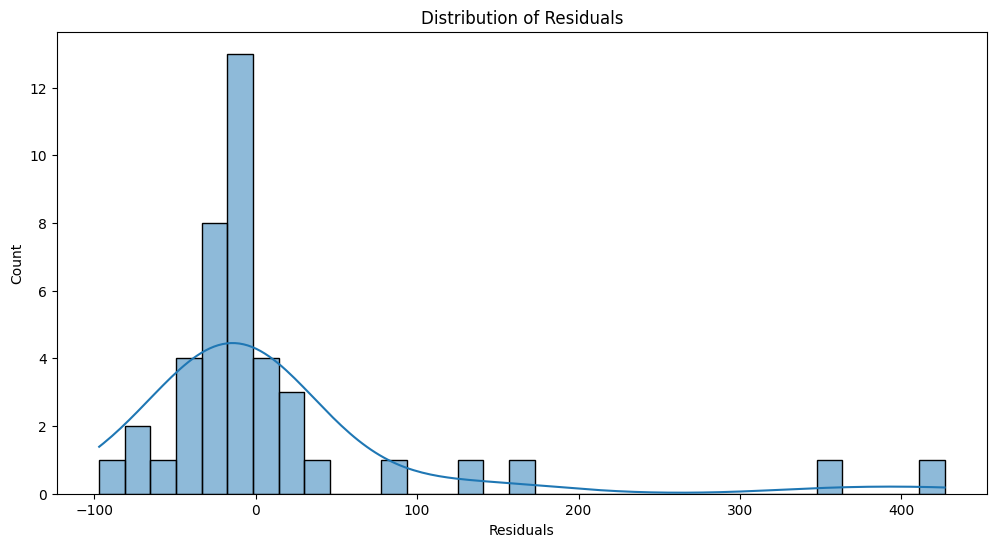

New Cross-validation scores: [0.53935124 0.83603643 0.74743263 0.85987641 0.92242593]
New Mean cross-validation score: 0.7810245264071513
New Mean Squared Error: 5357.2320559673
New R^2 Score: 0.8947640303439546


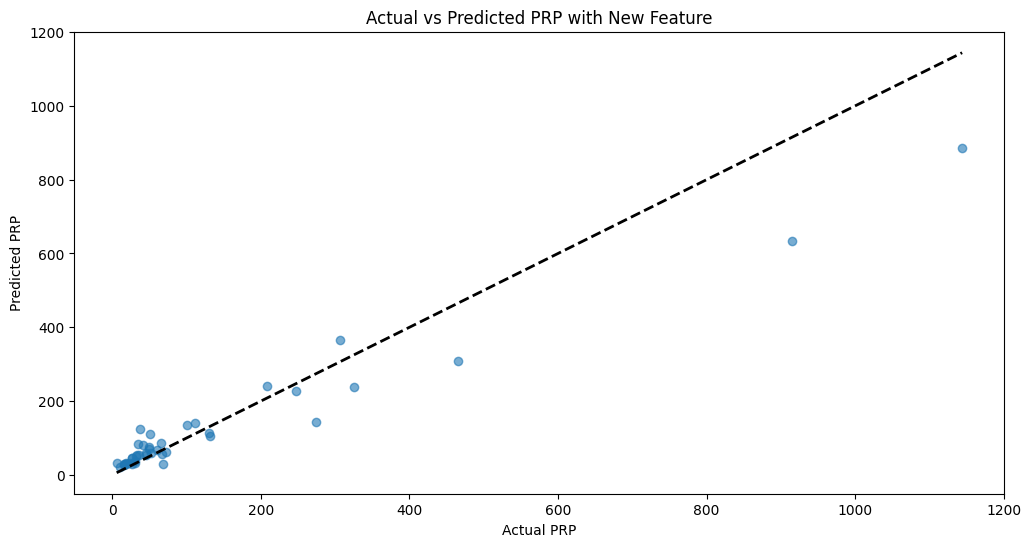

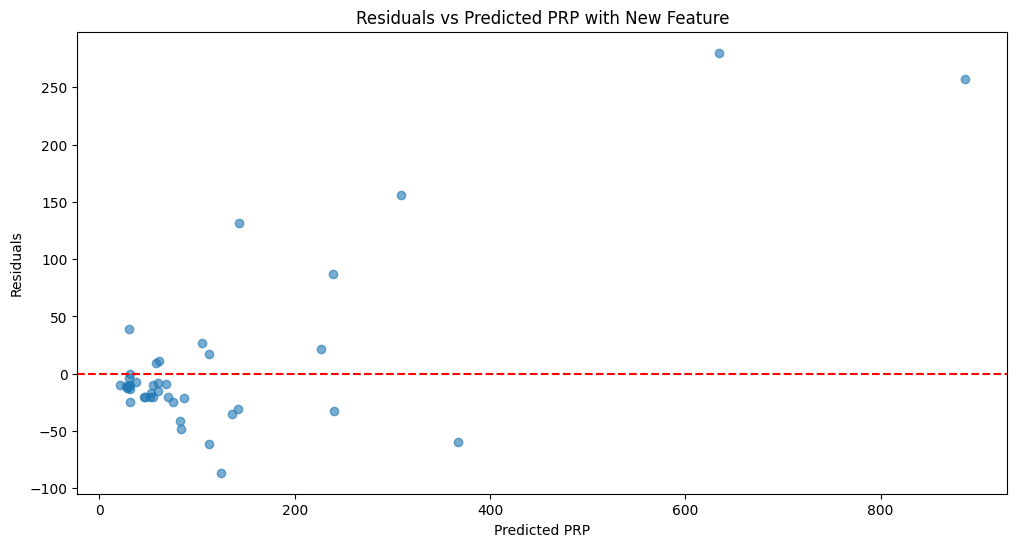

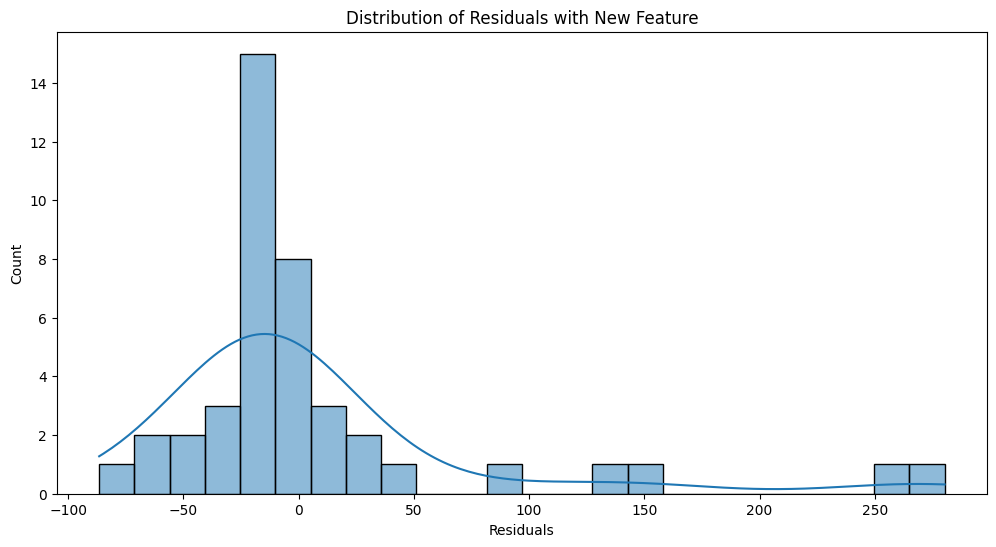

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# machine.data_update.csv 데이터 셋 불러오기
data = pd.read_csv('machine.data_update.csv')

# 결측값 확인 및 처리
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# 범주형 데이터를 숫자형 데이터로 수치화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'], drop_first=True)

# 특성과 타겟 분리
features = data.drop('PRP', axis=1)
target = data['PRP']

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 잔차 (Residual) 시각화
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PRP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PRP')
plt.show()

# 잔차의 분포
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# 새로운 피처 추가 (PRP_ERP의 곱)
data['PRP_ERP'] = data['PRP'] * data['ERP']

# 새로운 피처를 포함하여 특성과 타겟 분리
features_new = data.drop('PRP', axis=1)
scaled_features_new = scaler.fit_transform(features_new)

# 훈련 데이터와 테스트 데이터 분리
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(scaled_features_new, target, test_size=0.2, random_state=42)

# 새로운 모델 훈련 및 평가
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

# 교차 검증
cv_scores_new = cross_val_score(model_new, X_train_new, y_train_new, cv=5)
print('New Cross-validation scores:', cv_scores_new)
print('New Mean cross-validation score:', np.mean(cv_scores_new))

# 테스트 데이터로 예측
y_pred_new = model_new.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print('New Mean Squared Error:', mse_new)
print('New R^2 Score:', r2_new)

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(12, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.6)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP with New Feature')
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2)
plt.show()

# 잔차 (Residual) 시각화
residuals_new = y_test_new - y_pred_new
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_new, residuals_new, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PRP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PRP with New Feature')
plt.show()

# 잔차의 분포
plt.figure(figsize=(12, 6))
sns.histplot(residuals_new, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals with New Feature')
plt.show()